In [1]:
# Importing Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
# Load the Dataset
data = pd.read_csv('Test2.csv')
data.head()

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
0,2014,Property Damage Accident,8:30,01/03/2014,Friday,Y,Daylight,WATERTOWN,OVERTAKING,JEFFERSON,Straight and Level,Clear,NaN,Snow/Ice,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
1,2014,Property Damage & Injury Accident,14:48,01/03/2014,Friday,Y,Daylight,WATERTOWN,REAR END,JEFFERSON,Straight and Level,Cloudy,Traffic Signal,Snow/Ice,3 73022024,Not Applicable,"Other Motor Vehicle, Collision With",2
2,2014,Property Damage & Injury Accident,11:30,01/04/2014,Saturday,Y,Daylight,WATERTOWN,OTHER,JEFFERSON,Straight and Grade,Clear,NaN,Snow/Ice,NaN,Not Applicable,"Building/Wall, Collision With Fixed Object",1
3,2014,Property Damage Accident,7:45,01/03/2014,Friday,Y,Daylight,WATERTOWN,RIGHT ANGLE,JEFFERSON,Straight and Level,Clear,Stop Sign,Snow/Ice,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
4,2014,Property Damage Accident,15:11,01/04/2014,Saturday,Y,Daylight,WATERTOWN,RIGHT ANGLE,JEFFERSON,Straight and Level,Cloudy,NaN,Wet,3 73022020,Not Applicable,"Other Motor Vehicle, Collision With",2


In [3]:
# Fill missing values using mode for categorical columns
for col in ['DOT Reference Marker Location','Municipality','Traffic Control Device']:
    data[col] = data[col].fillna(data[col].mode()[0])

data.head()

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
0,2014,Property Damage Accident,8:30,01/03/2014,Friday,Y,Daylight,WATERTOWN,OVERTAKING,JEFFERSON,Straight and Level,Clear,Traffic Signal,Snow/Ice,495 03021043,Not Applicable,"Other Motor Vehicle, Collision With",2
1,2014,Property Damage & Injury Accident,14:48,01/03/2014,Friday,Y,Daylight,WATERTOWN,REAR END,JEFFERSON,Straight and Level,Cloudy,Traffic Signal,Snow/Ice,3 73022024,Not Applicable,"Other Motor Vehicle, Collision With",2
2,2014,Property Damage & Injury Accident,11:30,01/04/2014,Saturday,Y,Daylight,WATERTOWN,OTHER,JEFFERSON,Straight and Grade,Clear,Traffic Signal,Snow/Ice,495 03021043,Not Applicable,"Building/Wall, Collision With Fixed Object",1
3,2014,Property Damage Accident,7:45,01/03/2014,Friday,Y,Daylight,WATERTOWN,RIGHT ANGLE,JEFFERSON,Straight and Level,Clear,Stop Sign,Snow/Ice,495 03021043,Not Applicable,"Other Motor Vehicle, Collision With",2
4,2014,Property Damage Accident,15:11,01/04/2014,Saturday,Y,Daylight,WATERTOWN,RIGHT ANGLE,JEFFERSON,Straight and Level,Cloudy,Traffic Signal,Wet,3 73022020,Not Applicable,"Other Motor Vehicle, Collision With",2


In [4]:
# Converting date information into the correct format for time series analysis.
# Feature engineering on Date column to extract day, month
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data.head()

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved,Day,Month
0,2014,Property Damage Accident,8:30,2014-01-03,Friday,Y,Daylight,WATERTOWN,OVERTAKING,JEFFERSON,Straight and Level,Clear,Traffic Signal,Snow/Ice,495 03021043,Not Applicable,"Other Motor Vehicle, Collision With",2,3,1
1,2014,Property Damage & Injury Accident,14:48,2014-01-03,Friday,Y,Daylight,WATERTOWN,REAR END,JEFFERSON,Straight and Level,Cloudy,Traffic Signal,Snow/Ice,3 73022024,Not Applicable,"Other Motor Vehicle, Collision With",2,3,1
2,2014,Property Damage & Injury Accident,11:30,2014-01-04,Saturday,Y,Daylight,WATERTOWN,OTHER,JEFFERSON,Straight and Grade,Clear,Traffic Signal,Snow/Ice,495 03021043,Not Applicable,"Building/Wall, Collision With Fixed Object",1,4,1
3,2014,Property Damage Accident,7:45,2014-01-03,Friday,Y,Daylight,WATERTOWN,RIGHT ANGLE,JEFFERSON,Straight and Level,Clear,Stop Sign,Snow/Ice,495 03021043,Not Applicable,"Other Motor Vehicle, Collision With",2,3,1
4,2014,Property Damage Accident,15:11,2014-01-04,Saturday,Y,Daylight,WATERTOWN,RIGHT ANGLE,JEFFERSON,Straight and Level,Cloudy,Traffic Signal,Wet,3 73022020,Not Applicable,"Other Motor Vehicle, Collision With",2,4,1


In [5]:
# Following are the categorical columns containing non-numerical values and convert them to numerical using label encoding.
# Machine learning models generally work with numeric data

from sklearn.preprocessing import LabelEncoder

# columns to encode
categorical_cols = ['Time', 'Date', 'Day of Week', 'Police Report',
                    'Lighting Conditions', 'Municipality','Collision Type Descriptor',
                    'County Name', 'Road Descriptor', 'Weather Conditions',
                    'Traffic Control Device', 'Road Surface Conditions',
                    'DOT Reference Marker Location','Pedestrian Bicyclist Action',
                    'Event Descriptor']

# Looping through each categorical column to transform them
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

data['Crash Descriptor'] = label_encoder.fit_transform(data['Crash Descriptor'])

# Previewing the updated data
data.head()

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved,Day,Month
0,2014,3,1350,2,0,1,3,1214,4,22,4,0,14,5,50338,7,20,2,3,1
1,2014,2,348,2,0,1,3,1214,5,22,4,1,14,5,34393,7,20,2,3,1
2,2014,2,150,3,2,1,3,1214,3,22,3,0,14,5,50338,7,4,1,4,1
3,2014,3,1305,2,0,1,3,1214,6,22,4,0,12,5,50338,7,20,2,3,1
4,2014,3,371,3,2,1,3,1214,6,22,4,1,14,7,34389,7,20,2,4,1


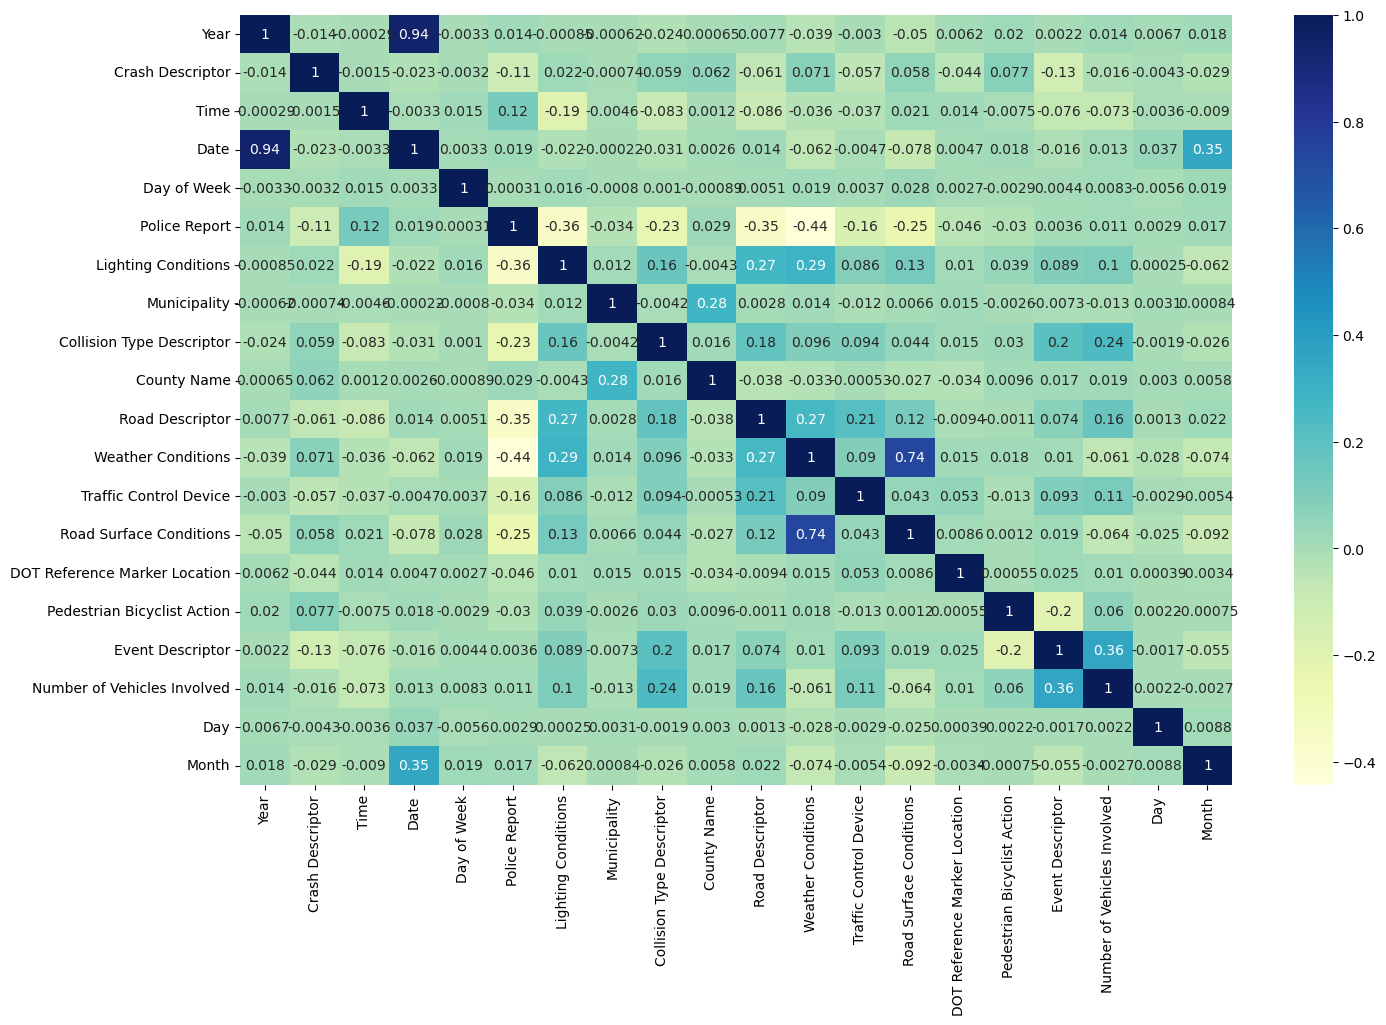

In [6]:
# Importing Seaborn and Matplotlib libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the size of the figure for the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

# Displaying the heatmap
plt.show()

In [7]:
# Checking out all the column names in the dataset
data.columns

Index(['Year', 'Crash Descriptor', 'Time', 'Date', 'Day of Week',
       'Police Report', 'Lighting Conditions', 'Municipality',
       'Collision Type Descriptor', 'County Name', 'Road Descriptor',
       'Weather Conditions', 'Traffic Control Device',
       'Road Surface Conditions', 'DOT Reference Marker Location',
       'Pedestrian Bicyclist Action', 'Event Descriptor',
       'Number of Vehicles Involved', 'Day', 'Month'],
      dtype='object')

In [8]:
# Importing RFE for feature selection and Logistic Regression for our model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
# Setting up RFE to choose the top 10 features that matter most for predicting 'Crash Descriptor'
rfe=RFE(lr,n_features_to_select=10)

# Defining the columns for analyzing for their importance
feature_columns=['Year', 'Crash Descriptor', 'Time', 'Date', 'Day of Week',
       'Police Report', 'Lighting Conditions', 'Municipality',
       'Collision Type Descriptor', 'County Name', 'Road Descriptor',
       'Weather Conditions', 'Traffic Control Device',
       'Road Surface Conditions', 'DOT Reference Marker Location',
       'Pedestrian Bicyclist Action', 'Event Descriptor',
       'Number of Vehicles Involved']

# Fitting the RFE model on our data and getting the ranking of each feature 
fit=rfe.fit(data[feature_columns],data['Crash Descriptor'])

# Creating a DataFrame to show which features are the most influential, and sorting them to see the best ones first 
feature_ranking=pd.DataFrame({'Features':feature_columns,'Ranking':fit.ranking_})
print(feature_ranking.sort_values(by='Ranking'))

                         Features  Ranking
8       Collision Type Descriptor        1
15    Pedestrian Bicyclist Action        1
13        Road Surface Conditions        1
12         Traffic Control Device        1
11             Weather Conditions        1
10                Road Descriptor        1
16               Event Descriptor        1
17    Number of Vehicles Involved        1
6             Lighting Conditions        1
1                Crash Descriptor        1
9                     County Name        2
2                            Time        3
3                            Date        4
7                    Municipality        5
0                            Year        6
14  DOT Reference Marker Location        7
5                   Police Report        8
4                     Day of Week        9


In [9]:
# Defining our features (X) and target (y) for the model
# X contains all the columns we’re using to predict 'Crash Descriptor'—our input data
# y is the 'Crash Descriptor' column we're trying to predict—our output data

X=data[['Year','Time', 'Date', 'Day of Week','Police Report', 'Lighting Conditions', 'Municipality','Collision Type Descriptor', 'County Name', 
        'Road Descriptor','Weather Conditions', 'Traffic Control Device','Road Surface Conditions', 'DOT Reference Marker Location',
        'Pedestrian Bicyclist Action', 'Event Descriptor','Number of Vehicles Involved']]
y=data['Crash Descriptor']

In [10]:
#Split the Data into Training and Test Sets which is important for model evaluation
from sklearn.model_selection import train_test_split

# 80% of the data goes into training (X_train, y_train) and 20% into testing (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [17]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [19]:
# Evaluating the model’s performance using accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
# importing CatBoost Classifier
from catboost import CatBoostClassifier

# Training it on our data with 100 iterations, a learning rate of 0.1, and depth of 6
catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)
catboost.fit(X_train, y_train)

# Making predictions with CatBoost on the test set and check the performance
y_pred_catboost = catboost.predict(X_test)

# Printing the accuracy, classification report, and confusion matrix to see how it stacks up against other models
print(f"CatBoost Accuracy: {accuracy_score(y_test, y_pred_catboost)}")
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_catboost))
print(f"Confusion Matrix (CatBoost):\n{confusion_matrix(y_test, y_pred_catboost)}")


CatBoost Accuracy: 0.7011228681132244
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       627
           1       0.74      0.59      0.65     36713
           2       0.52      0.04      0.07     34336
           3       0.70      0.96      0.81    107508

    accuracy                           0.70    179184
   macro avg       0.49      0.40      0.38    179184
weighted avg       0.67      0.70      0.63    179184

Confusion Matrix (CatBoost):
[[     0    249     54    324]
 [     0  21588    296  14829]
 [     0   3553   1367  29416]
 [     0   3941    892 102675]]


# Time Series Forecasting for Monthly Crash Counts:
Build a time series model, to forecast the number of crashes that occur month wise, using the provided dataset (Test3.csv) 
Document the process of model selection, including the rationale behind the chosen model and any preprocessing steps applied to the data. 
Evaluate the model performances by getting the MSE, MAE,RMSE along with the mean of the test set.

In [22]:
#copying the dataset to another dataframe:
df_time=data.copy()

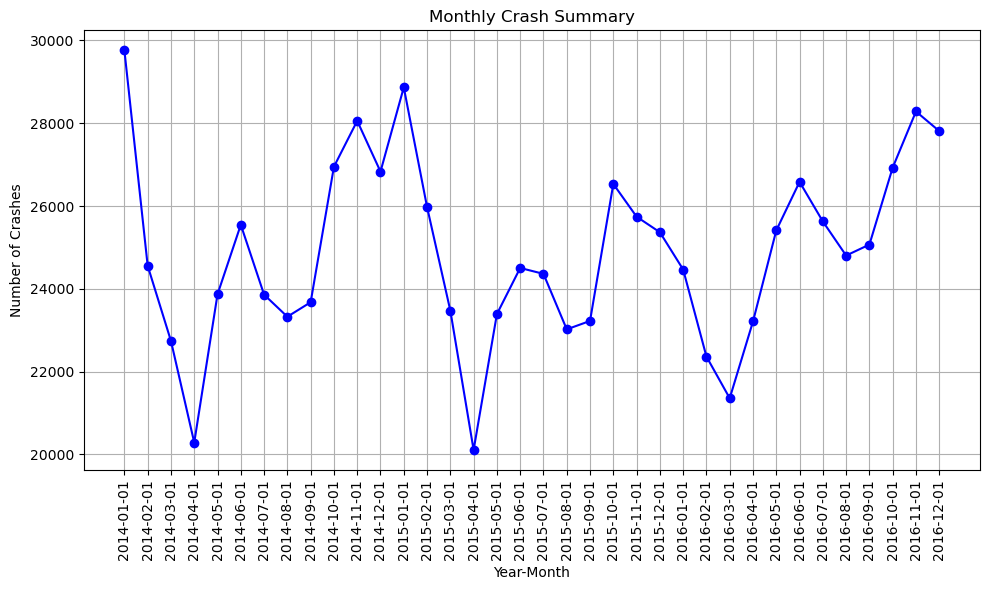

In [25]:
# Plotting the monthly crash summary over time—visualizing the crash
plt.figure(figsize=(10,6))
plt.plot(monthly_crash_summary.index.astype(str), monthly_crash_summary['Crash_Count'], marker='o', linestyle='-', color='b')
plt.xticks(rotation=90)  
plt.title('Monthly Crash Summary')
plt.xlabel('Year-Month')  
plt.ylabel('Number of Crashes') 
plt.grid(True)  
plt.tight_layout() 
plt.show() 


In [26]:
# Splitting the crash series data into training and testing sets for model training and evaluation
# Using 80% of the data for training and the remaining 20% for testing 
train_size = int(len(crash_series) * 0.8)
train_data = crash_series[:train_size]
test_data = crash_series[train_size:]

In [28]:
from statsmodels.tsa.arima.model import ARIMA

# Setting up the ARIMA model with (p, d, q) parameters for time series forecasting
# Using (1, 1, 1) as a starting point
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit() 

# Predicting future crash counts for the duration of the test period
future_crash_predictions = model_fit.forecast(steps=len(test_data))

# Combining actual test data with forecasted values for a clear comparison
forecast_comparison = pd.DataFrame({
    'Actual': test_data,
    'Forecast': future_crash_predictions
})


print("Future Crash Predictions:",future_crash_predictions)

print("\nActual vs Forecast:",forecast_comparison)


Future Crash Predictions: 2016-05-01    23159.817529
2016-06-01    23140.537704
2016-07-01    23133.130502
2016-08-01    23130.284697
2016-09-01    23129.191354
2016-10-01    23128.771298
2016-11-01    23128.609915
2016-12-01    23128.547912
Freq: MS, Name: predicted_mean, dtype: float64

Actual vs Forecast:             Actual      Forecast
2016-05-01   25411  23159.817529
2016-06-01   26583  23140.537704
2016-07-01   25627  23133.130502
2016-08-01   24803  23130.284697
2016-09-01   25068  23129.191354
2016-10-01   26928  23128.771298
2016-11-01   28284  23128.609915
2016-12-01   27811  23128.547912


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
 
# Evaluation metrics
# Mean Squared Error (MSE) to measure the average squared difference between actual and forecasted values
mse = mean_squared_error(forecast_comparison['Actual'], forecast_comparison['Forecast'])
# Root Mean Squared Error (RMSE) to get the square root of MSE, giving us an idea of the error magnitude
rmse = np.sqrt(mse)
# Mean Absolute Error (MAE) to measure the average absolute difference between actual and forecasted values
mae = mean_absolute_error(forecast_comparison['Actual'], forecast_comparison['Forecast'])
# Calculating the mean of the actual test data for reference
mean_test = test_data.mean()

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean of Test Set: {mean_test:.2f}")


Mean Squared Error (MSE): 11579031.61
Root Mean Squared Error (RMSE): 3402.80
Mean Absolute Error (MAE): 3179.51
Mean of Test Set: 26314.38


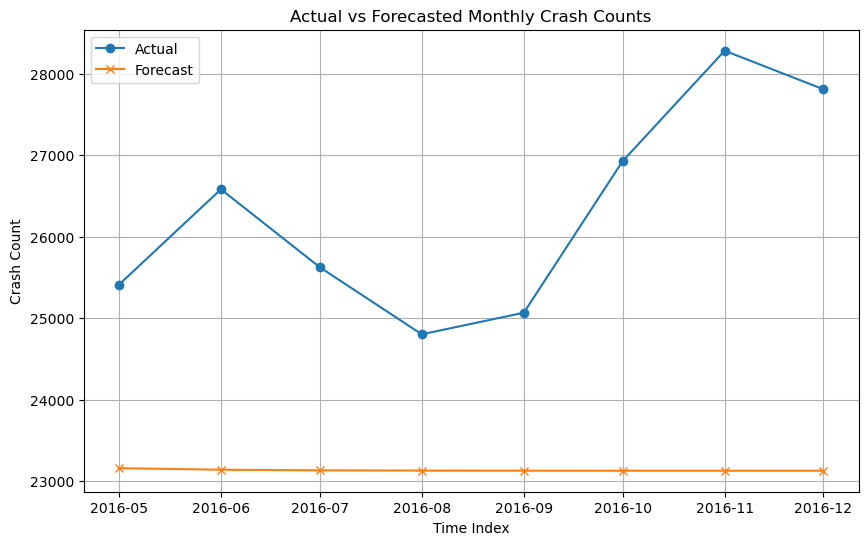

In [31]:
# Plot actual vs forecasted crash counts
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual', marker='o')
plt.plot(test_data.index, future_crash_predictions, label='Forecast', marker='x')
plt.title('Actual vs Forecasted Monthly Crash Counts')
plt.xlabel('Time Index')
plt.ylabel('Crash Count')
plt.legend()
plt.grid(True)
plt.show()
